House Price Prediction using Linear Regression in Machine Learning

In [21]:
#importing lib
import numpy as np #math
import pandas as pd #data manipulation
import matplotlib.pyplot as plt #plot visualization
from sklearn.preprocessing import MinMaxScaler #performing preprocessing step feature scaling using z-normalization(Standard scalar) technique
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns

Task 1: Analysing Data 
(Source from Kaggle) 

In [22]:
#loading the dataset
data = pd.read_csv('Housing.csv')

In [23]:
data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [24]:
data.describe


<bound method NDFrame.describe of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       

In [25]:
#pullling non-numeric data
data_col=[]
for i in data.columns:
    if data[i].values.dtype == 'object':
        data_col.append(i)
data_col.remove('furnishingstatus')
print(data_col)

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']


Task 2: Performing Binary Encoding

In [26]:
#binary encoding
mapping1 = {'yes':1, 'no':0}
for i in data_col:
    data[i] = data[i].map(mapping1)


mapping2= {'furnished':0, 'semi-furnished':1, 'unfurnished':2}
data['furnishingstatus']=data['furnishingstatus'].map(mapping2)
data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


Task 3: Visualization using Heat Map

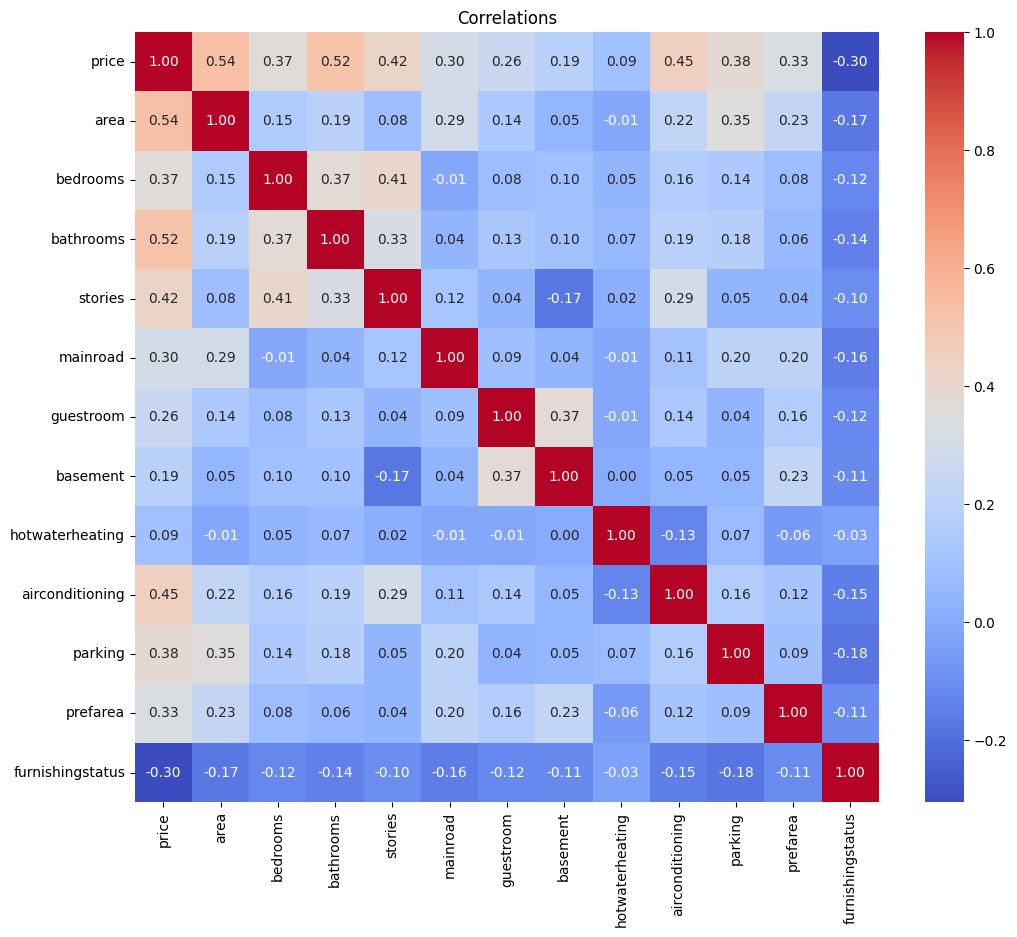

In [27]:
correlation_matrix= data.corr()
# Building a heat map for correlation matrix
plt.figure(figsize=(12, 10))

# Constructs a heat map, where 
# correlation_matrix is the correlation matrix
# annot=True adds numeric values to the cells
# cmap='coolwarm' sets the color palette
# fmt=".2f" formats numeric values to two decimal places.

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlations")
plt.show()

Task 4: Feature Scaling

In [28]:
#feature scaling
#create scaler object
scale=MinMaxScaler()

data[data.columns]=scale.fit_transform(data[data.columns])
data.head(5)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.5
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0


In [29]:
y = data['price']
X = data.drop(['price'],axis=1)
print(X.head(5))
print(y.head(5))

       area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
0  0.396564       0.6   0.333333  0.666667       1.0        0.0       0.0   
1  0.502405       0.6   1.000000  1.000000       1.0        0.0       0.0   
2  0.571134       0.4   0.333333  0.333333       1.0        0.0       1.0   
3  0.402062       0.6   0.333333  0.333333       1.0        0.0       1.0   
4  0.396564       0.6   0.000000  0.333333       1.0        1.0       1.0   

   hotwaterheating  airconditioning   parking  prefarea  furnishingstatus  
0              0.0              1.0  0.666667       1.0               0.0  
1              0.0              1.0  1.000000       0.0               0.0  
2              0.0              0.0  0.666667       1.0               0.5  
3              0.0              1.0  1.000000       1.0               0.0  
4              0.0              1.0  0.666667       0.0               0.0  
0    1.000000
1    0.909091
2    0.909091
3    0.906061
4    0.836364
Name: price

In [30]:
#spliting train and test
#test is less than train (436+109= 545)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
print("Training set shape-X:",X_train.shape, "y:", y_train.shape)
print("Training set shape-X:",X_test.shape, "y:", y_test.shape)

Training set shape-X: (436, 12) y: (436,)
Training set shape-X: (109, 12) y: (109,)


Task 5: Linear Regression

In [31]:
#train the model using linear regression
#create and for the model
model= LinearRegression()
model.fit(X_train, y_train)

#predict
pred_model = model.predict(X_test)


In [32]:
pred1=model.predict([[0.396564 , 0.6 ,  0.333333,  0.666667 ,  1.0, 0.0 ,  0.0  ,  0.0 ,  1.0,0.666667 , 1.0 , 0.0 ]])
print(pred1)

[0.54147822]


/Users/sharlenegandham/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [33]:
y_test= y_test.values.reshape(-1,1)
data_fram = pd.DataFrame({'actual ':y_test.flatten(), 'predicted ': pred_model.flatten()})
data_fram.head(10)

,actual,predicted
0,0.200000,0.299021
1,0.424242,0.476797
2,0.169697,0.113665
3,0.406061,0.243255
4,0.090909,0.137050
5,0.272727,0.156977
6,0.303030,0.337270
7,0.241818,0.403808
8,0.060606,0.087085
9,0.138788,0.079562


In [34]:
# the accuracy code:
# Calculate R2 score
r2 = r2_score(y_test, pred_model)

# Print the R2 score
print(f'R2 Score: {r2}')

R2 Score: 0.6494754192267795


Task 6: Visualization using Scatter Plot

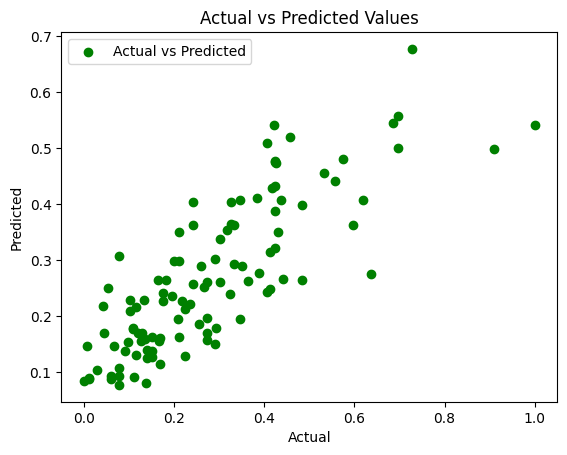

In [35]:
#plotting scatter
plt.scatter(y_test, pred_model, color='green', marker='o', label='Actual vs Predicted')

# Set the title and labels for the plot
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual', fontsize=10)
plt.ylabel('Predicted', fontsize=10)

# Add legend
plt.legend()

# Display the plot
plt.show()

Task 7: Application of Gradient Descent

In [36]:


#Gradient Descent is used to reduce cost function
# Define the cost function (mean squared error)
def cost_function(X, y, theta):
    num_samples = len(y)
    y_pred = np.dot(X, theta)
    error = y_pred - y
    cost = np.sum(error**2) / (2 * num_samples)
    return cost

# Perform gradient descent in a function
def gradient_descent(X, y, learning_rate, no_iter):
    num_samples, num_features = X.shape
    theta = np.zeros(num_features)  # first, initialize theta with zeros
    costs = [] #initialize empty list
    
    for iteration in range(num_iterations):
        # Calculate the predicted values
        y_pred = np.dot(X, theta)
        
        # Calculate the gradient using the formula
        gradient = (1/num_samples) * np.dot(X.T, (y_pred - y))
        
        # Update theta using the gradient and learning rate
        theta = theta - learning_rate * gradient
        
        # Calculate the cost and add it to costs list
        cost = cost_function(X, y, theta)
        costs.append(cost)
        
    return theta, costs

# Setting hyperparameters which give us the best accuracy rate
learning_rate = 0.1
num_iterations = 1000

# Function call the gradient descent method
theta, costs = gradient_descent(X, y, learning_rate, num_iterations)
# Making predictions on the test data
y_pred = np.dot(X_test, theta)


Task 8: Displaying the Improved Accuracy 

In [37]:
# the accuracy code after using gradient descent
# Calculate R2 score
r2 = r2_score(y_test, y_pred)

# Print the R2 score
print(f'R2 Score after using gradient descent: {r2}')

R2 Score after using gradient descent: 0.6776282522565544
